# *MOVIE RATING PREDICTION USING PYTHON*

IMPORTING REQUIRED LIBRARIES

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import chardet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
# Detect the encoding of the CSV file
with open('/content/drive/MyDrive/car_purchasing.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the CSV file using the detected encoding
df = pd.read_csv('/content/drive/MyDrive/IMDb-Movies-India.csv', encoding=result['encoding'])


In [62]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


DATA PREPROCESSING

*Removing unneccessary columns*

In [63]:
df.drop(['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis = 1, inplace = True)
df.head()

,Year,Duration,Genre,Rating,Votes
0,NaN,NaN,Drama,NaN,NaN
1,(2019),109 min,Drama,7.0,8
2,(2021),90 min,"Drama, Musical",NaN,NaN
3,(2019),110 min,"Comedy, Romance",4.4,35
4,(2010),105 min,Drama,NaN,NaN


In [64]:
df.shape

(15509, 5)

In [65]:
df.isnull().sum()

Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
dtype: int64

DROPPING NULL VALUES

In [66]:
df.dropna(inplace = True)
df.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
dtype: int64

In [67]:
df.head()

,Year,Duration,Genre,Rating,Votes
1,(2019),109 min,Drama,7.0,8
3,(2019),110 min,"Comedy, Romance",4.4,35
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086"
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 1 to 15508
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5820 non-null   object 
 1   Duration  5820 non-null   object 
 2   Genre     5820 non-null   object 
 3   Rating    5820 non-null   float64
 4   Votes     5820 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.8+ KB


In [69]:
df.dtypes

Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
dtype: object

In [70]:
df.shape

(5820, 5)

In [71]:
# Convert 'Duration' to int64 (assuming 'Duration' contains numbers without units)
df['Duration'] = df['Duration'].str.replace(' min', '').astype('int64')

# Convert 'Votes' to int64 (assuming 'Votes' contains numeric values with commas)
df['Votes'] = df['Votes'].str.replace(',', '').astype('int64')

In [72]:
df['Year'] = df['Year'].str.replace(r'[^\d]+', '', regex=True).astype('Int64')

In [73]:
df.dtypes

Year          Int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
dtype: object

In [74]:
df.shape

(5820, 5)

In [75]:
df.head()

,Year,Duration,Genre,Rating,Votes
1,2019,109,Drama,7.0,8
3,2019,110,"Comedy, Romance",4.4,35
5,1997,147,"Comedy, Drama, Musical",4.7,827
6,2005,142,"Drama, Romance, War",7.4,1086
8,2012,82,"Horror, Mystery, Thriller",5.6,326


In [76]:
df = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

In [77]:
df.head()

,Year,Duration,Genre,Rating,Votes
1,2019,109,Drama,7.0,8
3,2019,110,Comedy,4.4,35
3,2019,110,Romance,4.4,35
5,1997,147,Comedy,4.7,827
5,1997,147,Drama,4.7,827


LABEL ENCODER

In [78]:
label_encoder = LabelEncoder()
categorical_col = df.select_dtypes(include=['object']).columns
for col in categorical_col:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Year,Duration,Genre,Rating,Votes
1,2019,109,7,7.0,8
3,2019,110,4,4.4,35
3,2019,110,16,4.4,35
5,1997,147,4,4.7,827
5,1997,147,7,4.7,827


DATA VISUALIZATION

In [79]:
ds = df.groupby('Genre').agg({'Rating': 'mean', 'Votes': 'mean'}).reset_index()

In [80]:
top_ratings_alternative = ds.nlargest(10, 'Rating')

print(top_ratings_alternative)

    Genre    Rating         Votes
6       6  7.586154    200.807692
15     15  7.250000     36.000000
10     10  6.945631   5705.961165
3       3  6.840476   9229.547619
18     18  6.634091  11054.318182
8       8  6.353972   1519.556075
13     13  6.250721   3213.189904
12     12  6.129091   6721.127273
7       7  6.067403   3072.211853
20     20  6.041176   3219.588235


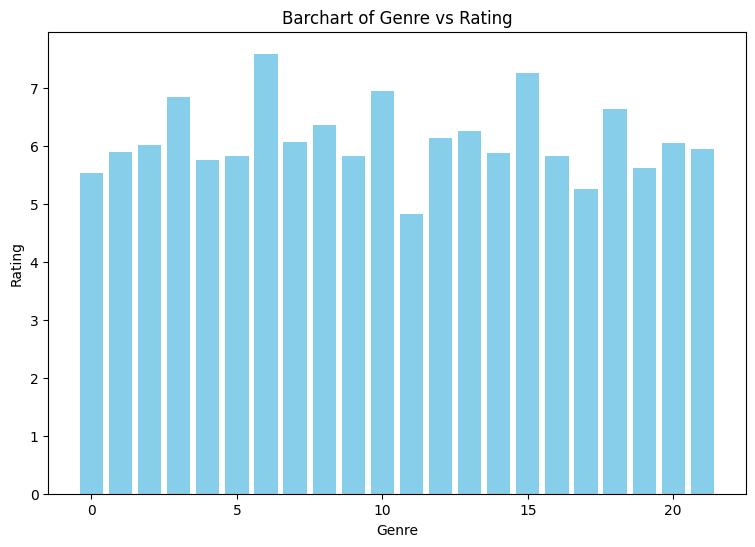

In [81]:
top_ratings = ds[['Genre', 'Rating']].groupby('Genre').mean().reset_index()

plt.figure(figsize = (9,6))
plt.bar(top_ratings['Genre'], top_ratings['Rating'], color = 'skyblue')
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.title("Barchart of Genre vs Rating")
plt.show()


In [82]:
top_votes_alternative = ds.nlargest(10, 'Votes')
print(top_votes_alternative)

    Genre    Rating         Votes
18     18  6.634091  11054.318182
3       3  6.840476   9229.547619
12     12  6.129091   6721.127273
9       9  5.820946   6172.108108
10     10  6.945631   5705.961165
1       1  5.892254   5664.327465
4       4  5.757470   4481.762574
5       5  5.826196   3805.830296
17     17  5.257143   3644.628571
20     20  6.041176   3219.588235


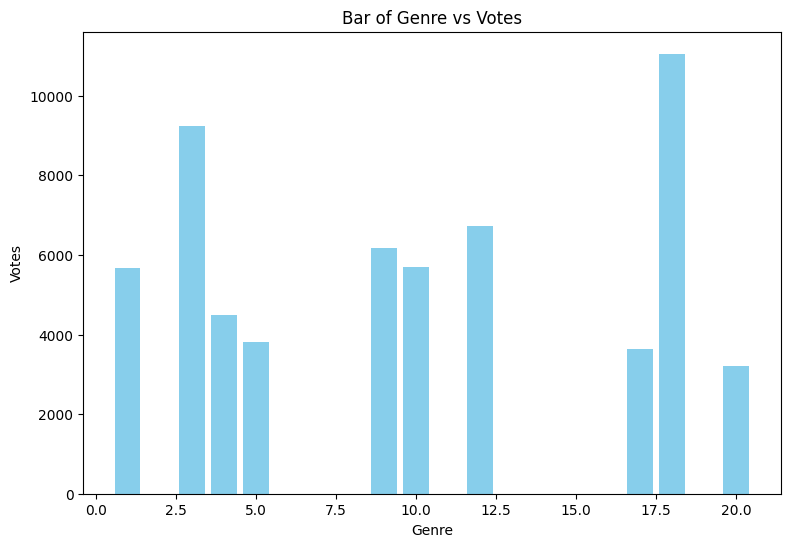

In [83]:
plt.figure(figsize = (9,6))
plt.bar(top_votes_alternative['Genre'], top_votes_alternative['Votes'], color='skyblue')
plt.xlabel("Genre")
plt.ylabel("Votes")
plt.title("Bar of Genre vs Votes")
plt.show()

TRAIN-TEST SPLITTING

In [84]:
x_data = df.drop(['Rating'], axis = 1)
y_data = df['Rating']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 42)

MODEL BUILDING

In [85]:
# Create a RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(x_train, y_train)

# Make predictions on the test data
y_predict = rf.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict) * 100
print("Mean squared error is", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root mean squared error is", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predict) * 100
print("Mean absolute error is", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_predict) * 100
print("R2_score is", r2)


Mean squared error is 82.23913603213138
Root mean squared error is 9.068579603892298
Mean absolute error is 63.31477437456161
R2_score is 56.27018232047622


PREDICTING UNSEEN DATA

In [86]:
rf.predict([[107, 5, 8, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.799])